# Imports

In [1]:

from sklearn import preprocessing

from models.neural_net import NeuralNet
from view.visualizer import *



# Dataset creation

In [5]:
xd = 3  # Input space dimensions
yd = 4  # Output dimension
num_samples = 1000  # Number of data points
epochs = 100  # Number of training epochs
l = [100]  # Number of neurons in each layer

dataset = Dataset()
dataset.create_dataset_sinus_2d(num_samples)
dataset.scale(preprocessing.MinMaxScaler(feature_range=(-5, 5)))
dataset.split_train_test(0.2)



# Neural Network training with Adam

In [6]:
from utils.preprocessing import find_center_and_magnitude

model_nn = NeuralNet()
model_nn.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=100)
y_nn_train = model_nn.predict(dataset.X_train)
y_nn_test = model_nn.predict(dataset.X_test)
print(find_center_and_magnitude(model_nn.weights[1], model_nn.biases[1]))


(0.000252446, 0.40530283996781)


# Sampled Netwrok training.
### very first algorithm


Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 9602.12it/s]


train: loss(y_nn, y_sampled)
r2: -0.3921452073953373	mse: 5.0923470137033116
test: loss(y_nn, y_sampled)
r2: -0.4485447147569358	mse: 4.967184062282513
weights1 equals weights2:  False


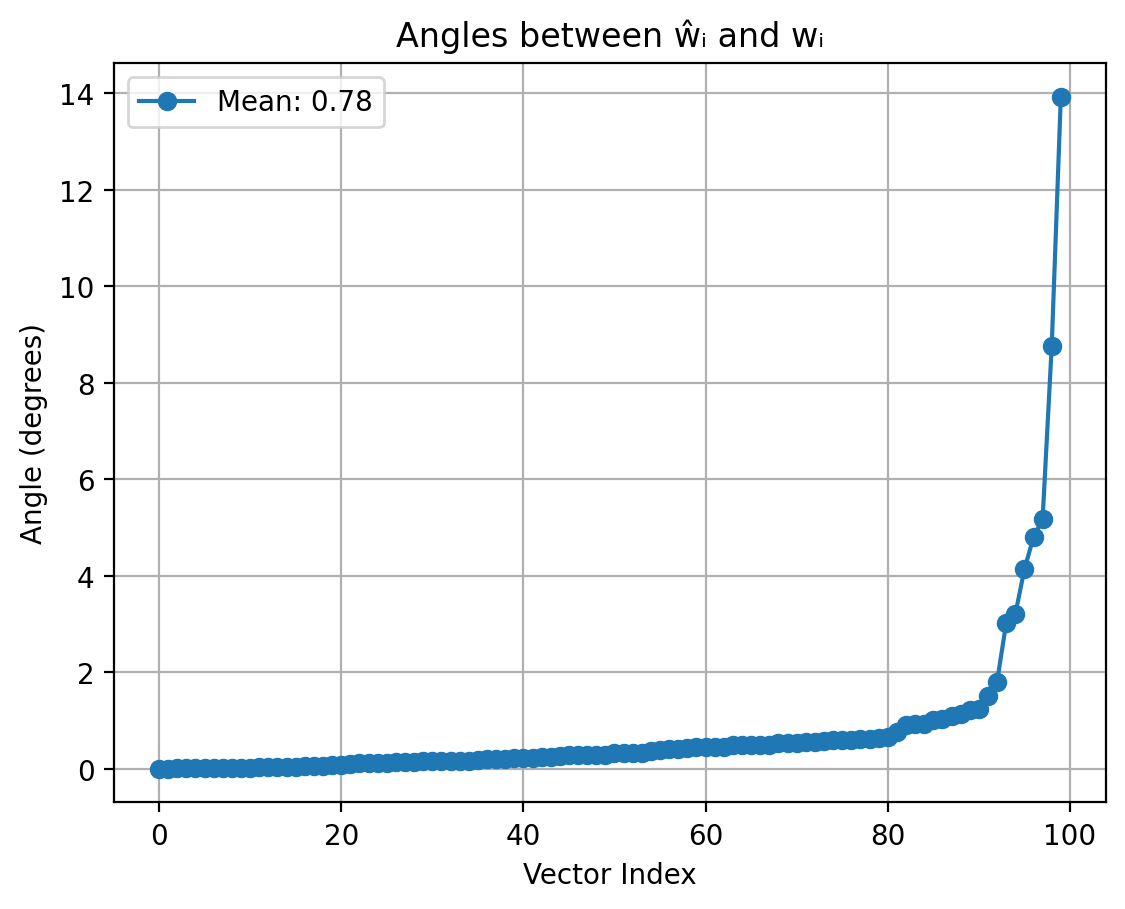

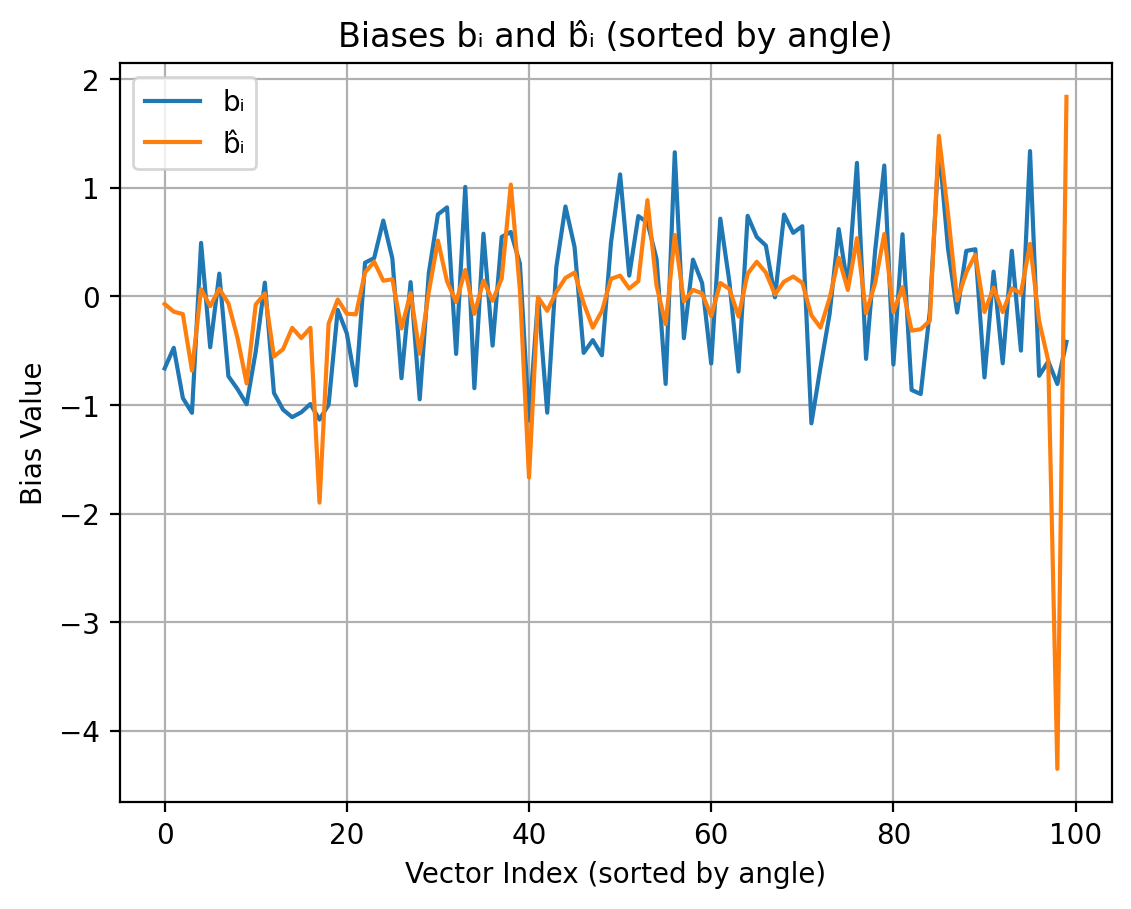

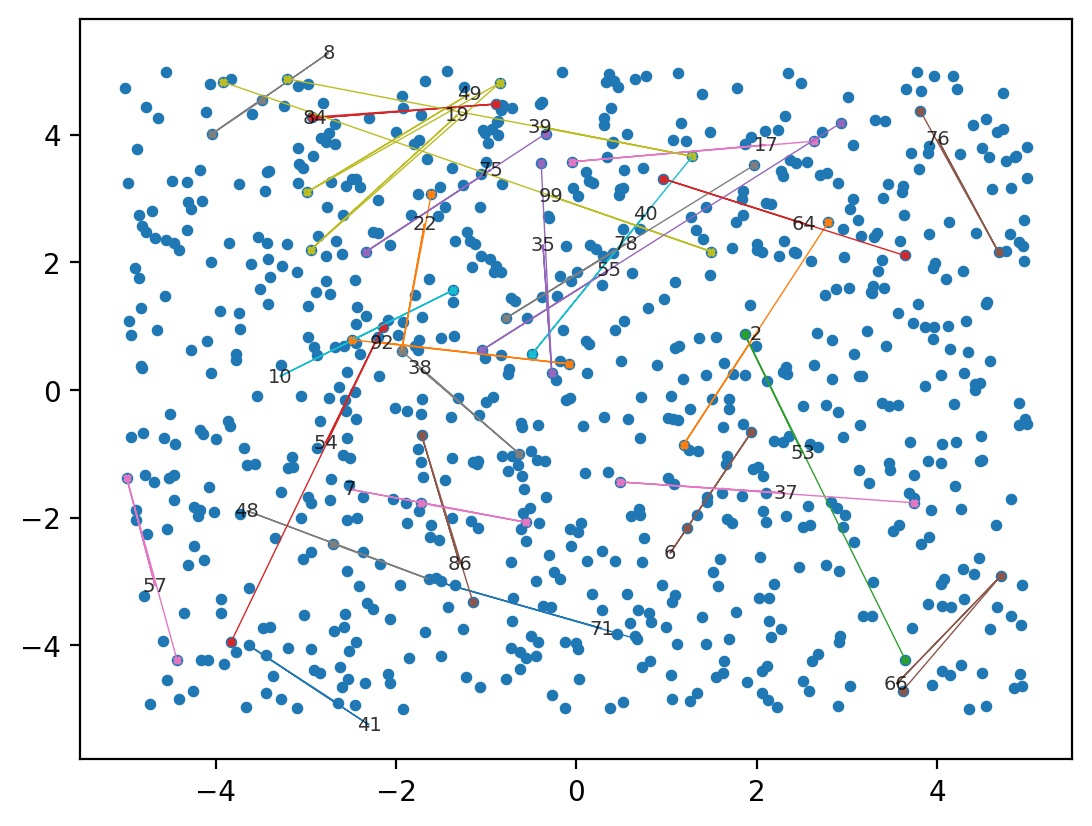

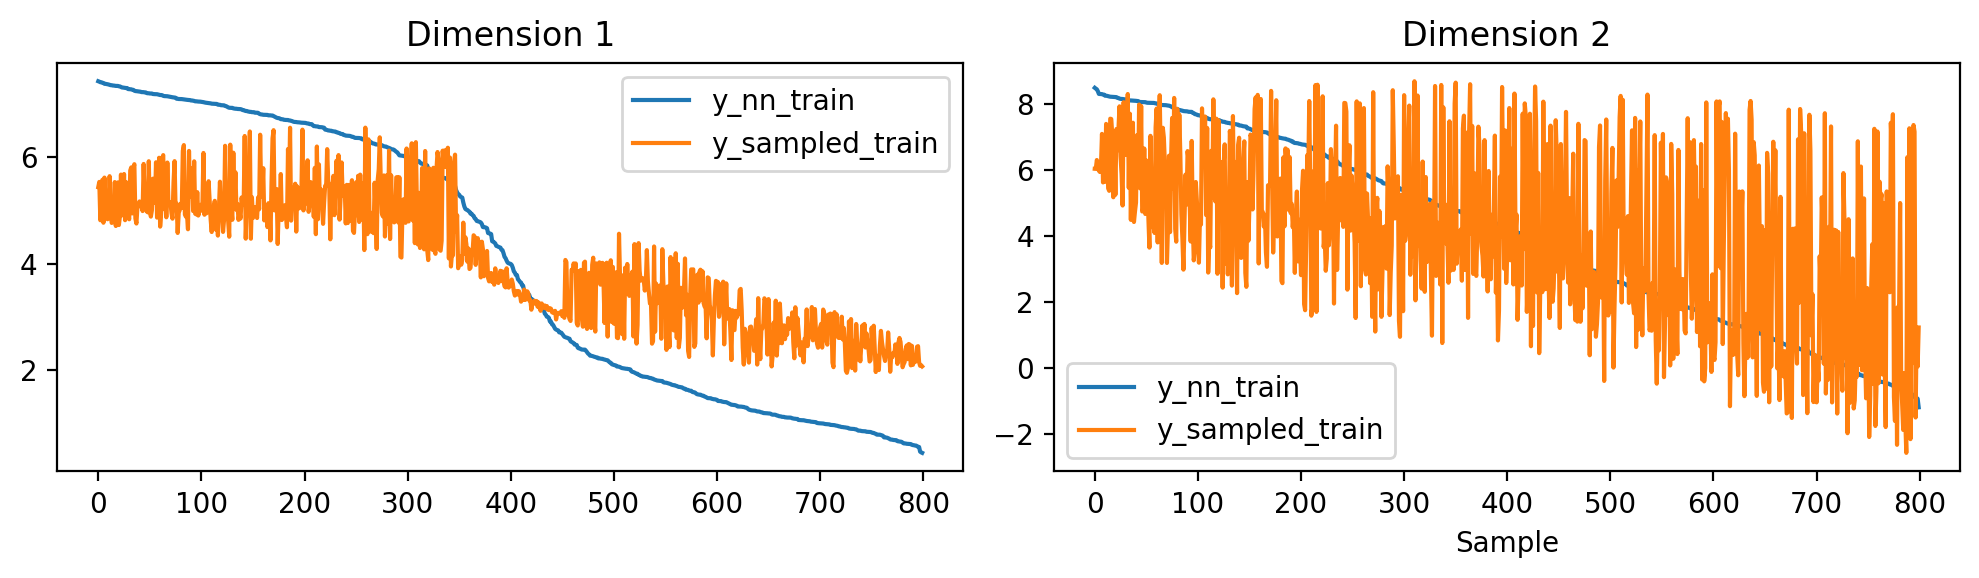

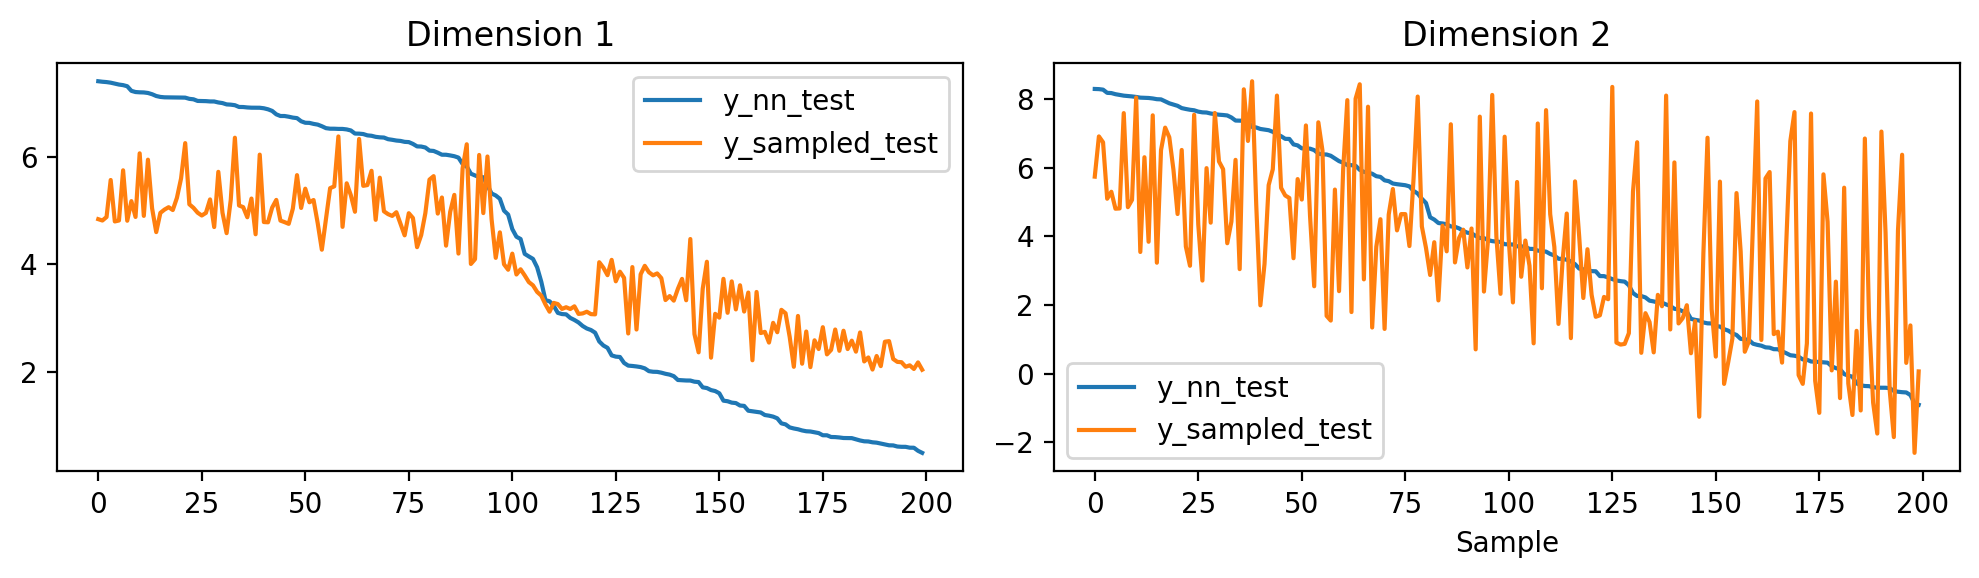

In [7]:
model_sampled = SampledNet()
x_1_X2_tuples = model_sampled.fit(dataset.X_train, y_nn_train, model_nn, layer2="classic", choose_x_2="angle")

model_nn_vs_model_sampled(dataset, model_nn, model_sampled, x_1_X2_tuples)

### add radius: an interval for the distance to the bias origin, and choose x_2, so that \hat{w_i} has the closest norm to w_i

Layer1 sampling: 100%|██████████| 100/100 [00:01<00:00, 89.39it/s]


train: loss(y_nn, y_sampled)
r2: 0.9834974195467501	mse: 0.11720475753653115
test: loss(y_nn, y_sampled)
r2: 0.983557056853867	mse: 0.1164536378703186
weights1 equals weights2:  False


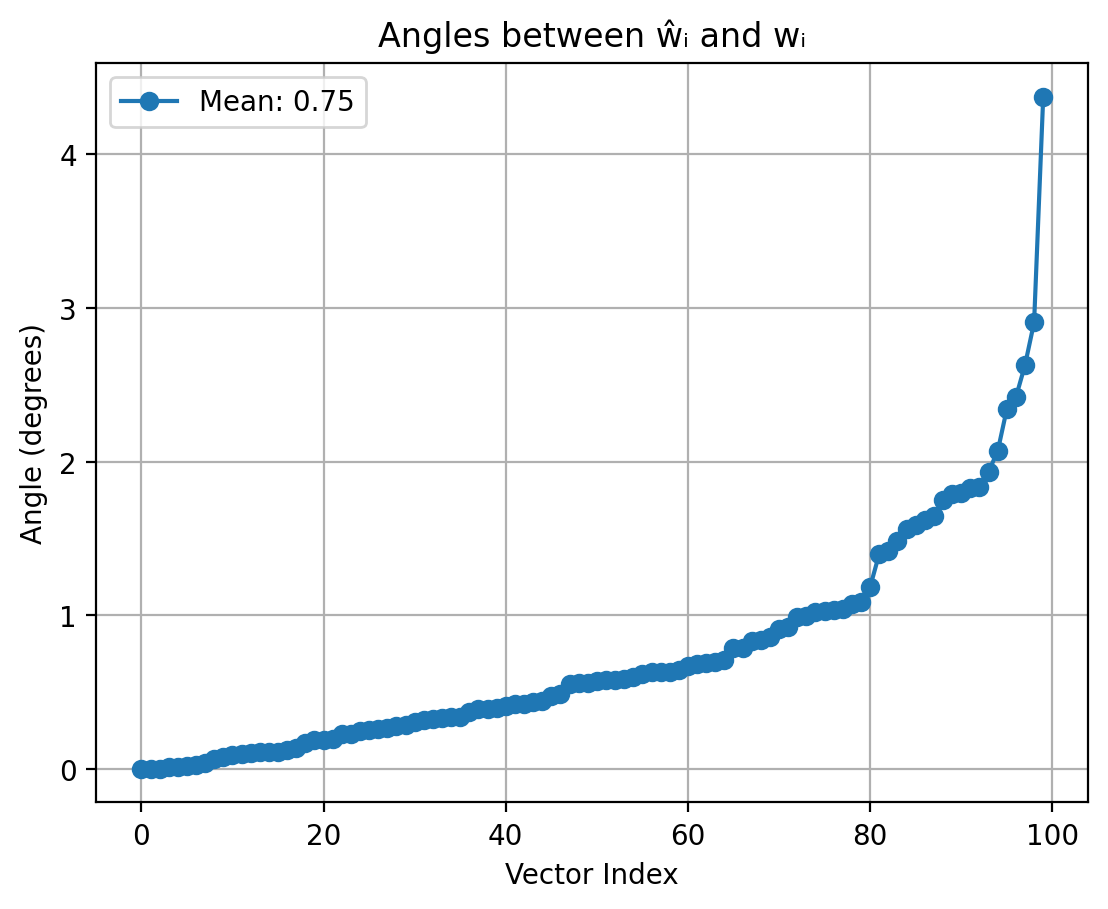

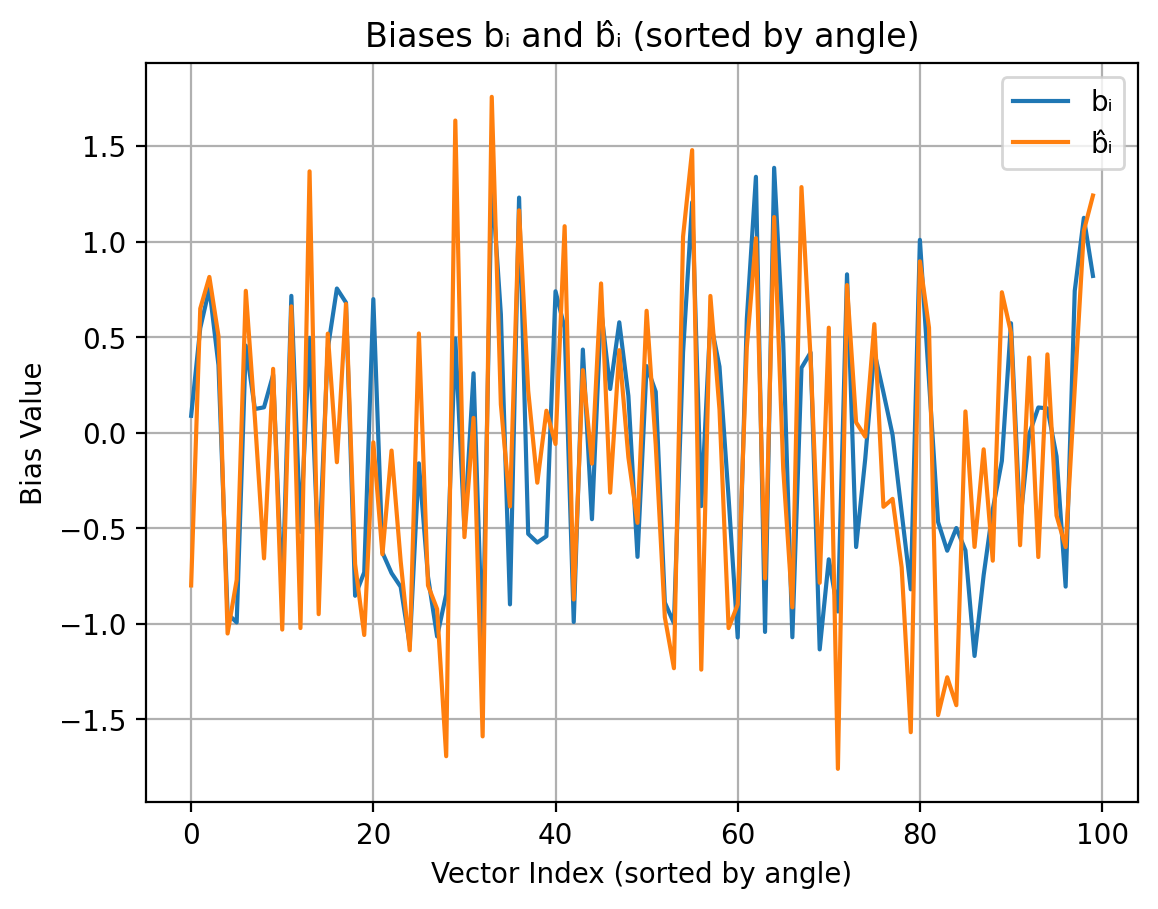

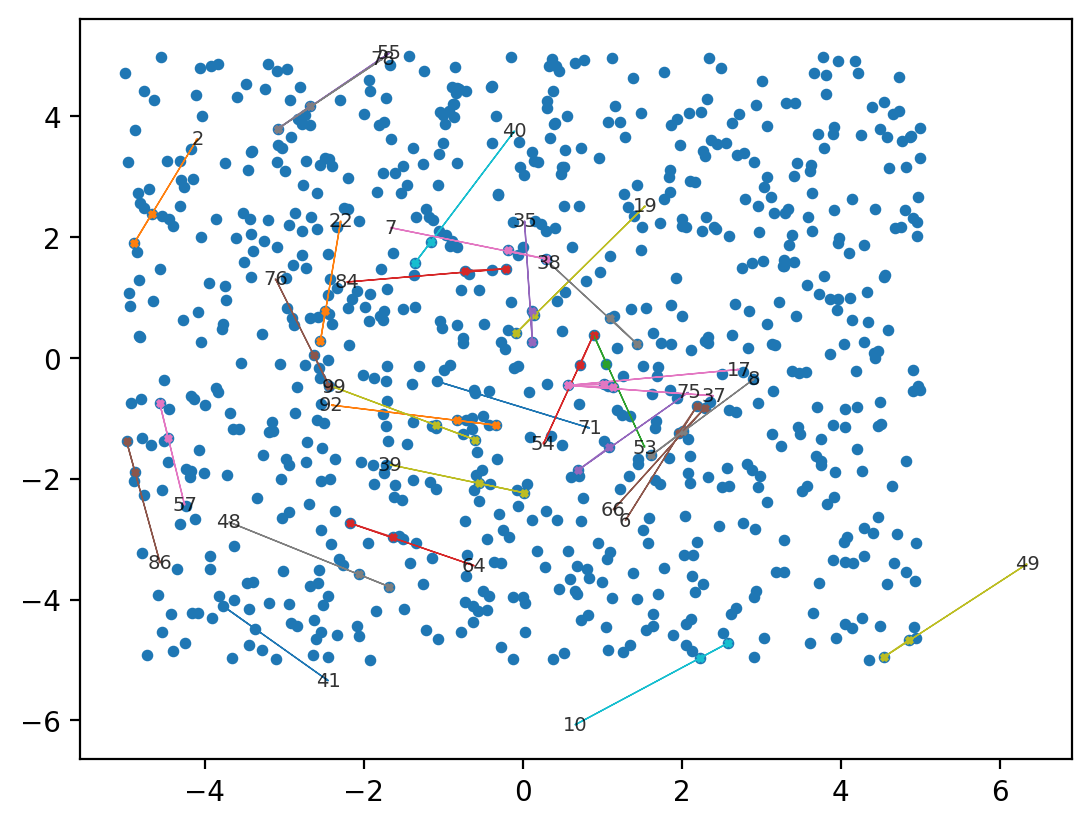

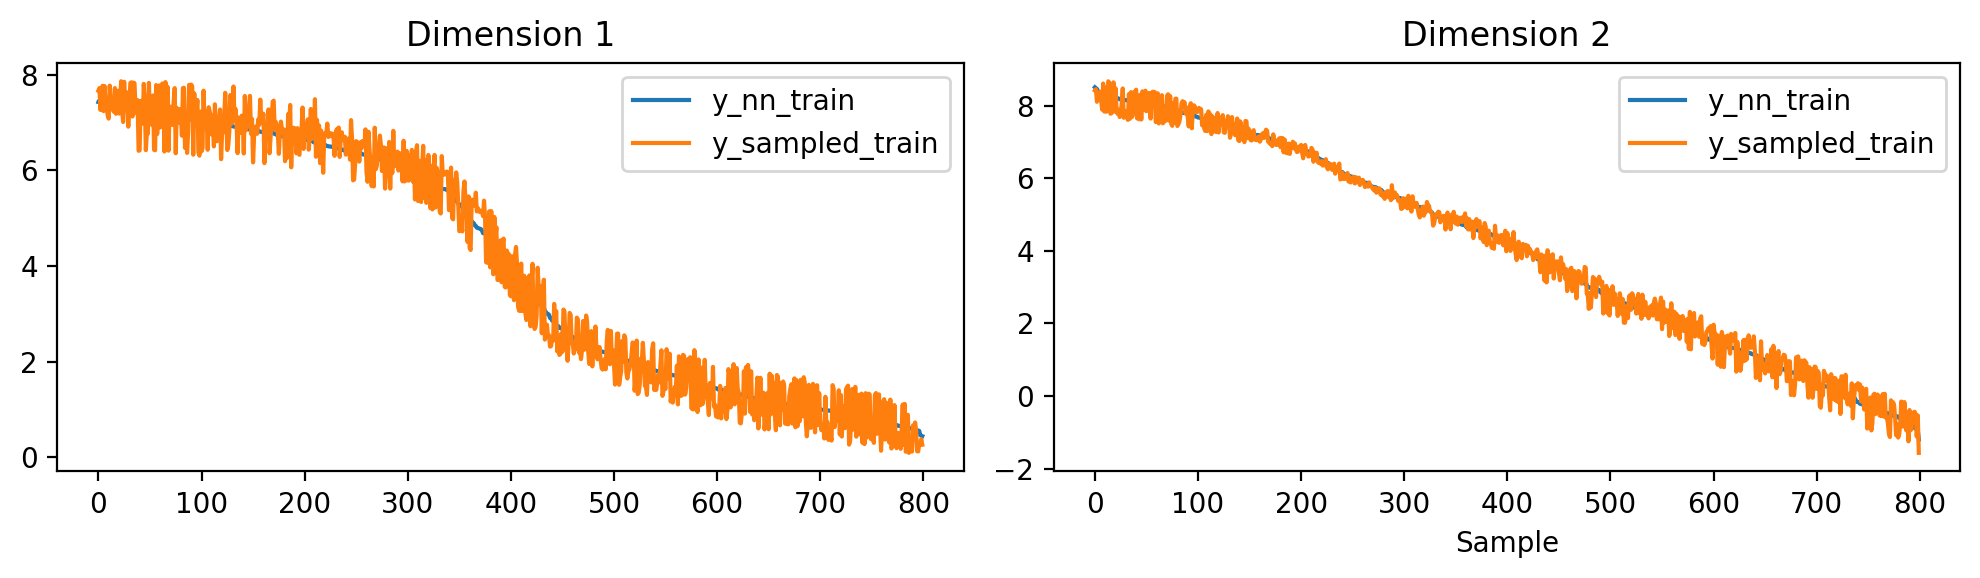

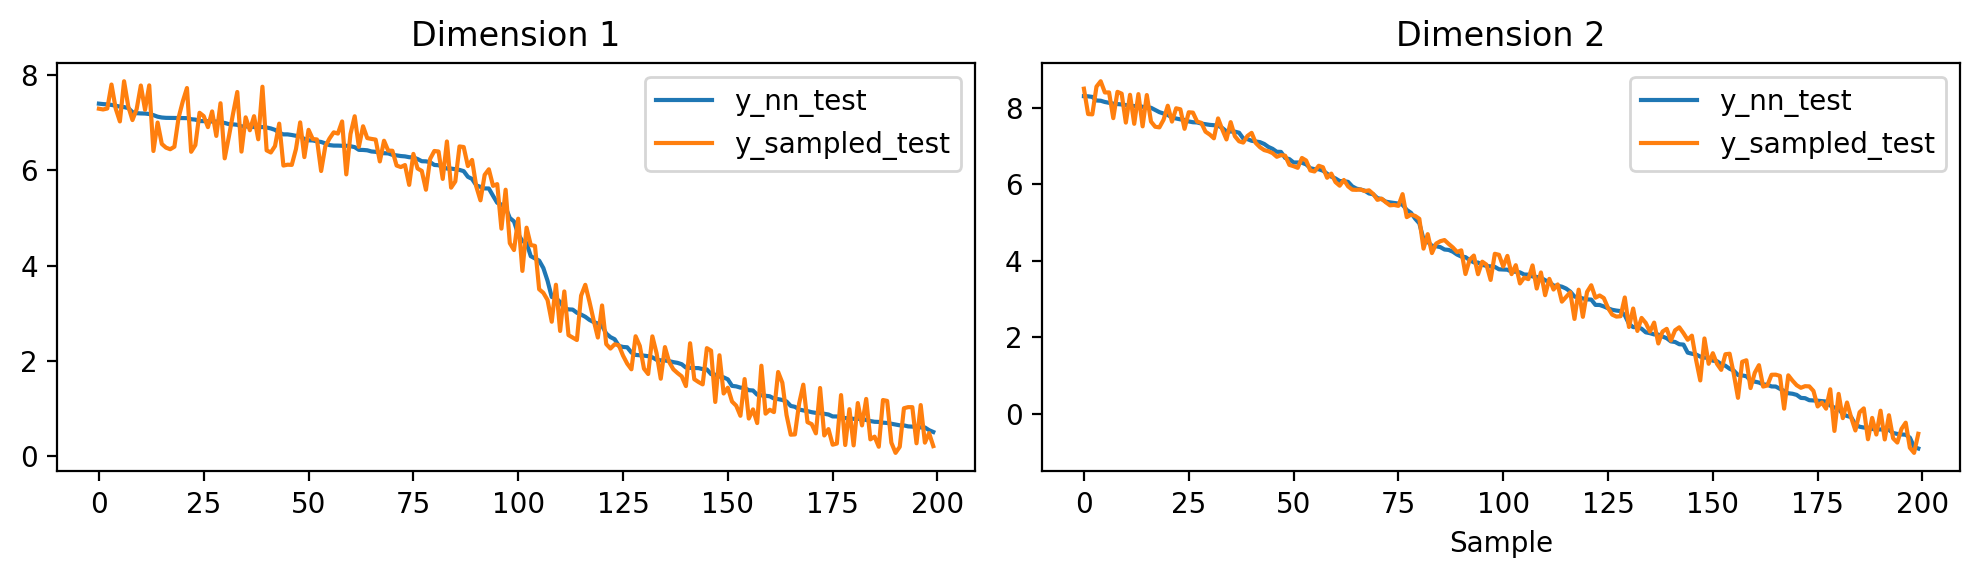

In [10]:
model_sampled = SampledNet()
x_1_X2_tuples = model_sampled.fit(dataset.X_train, y_nn_train, model_nn, layer2="classic", radius=0.09,
                                  choose_x_2="norm")
model_nn_vs_model_sampled(dataset, model_nn, model_sampled, x_1_X2_tuples)


### shift x_1 and x_2 so that x_1 lies on the original bias origin

Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 112.70it/s]


train: loss(y_nn, y_sampled)
r2: 0.998258527024299	mse: 0.012674663055045427
test: loss(y_nn, y_sampled)
r2: 0.9982244011677577	mse: 0.013107802908027457
weights1 equals weights2:  False


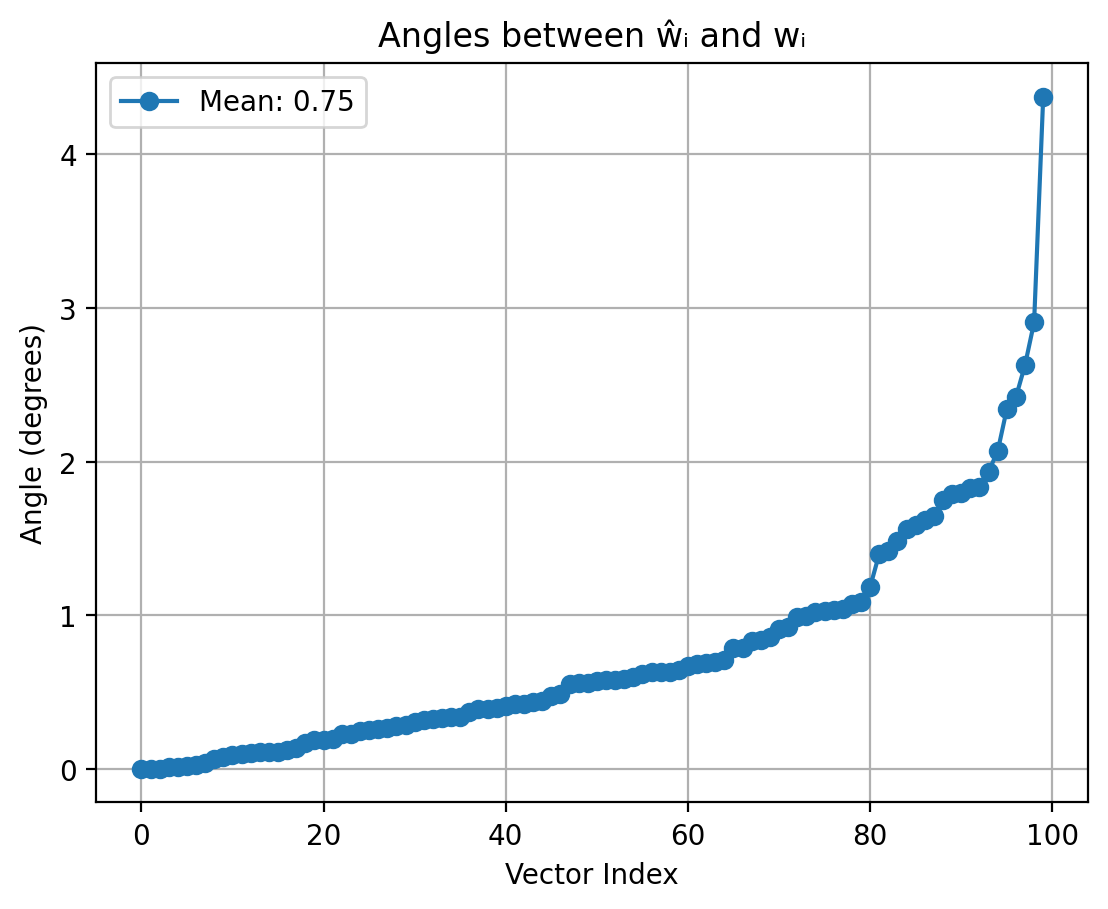

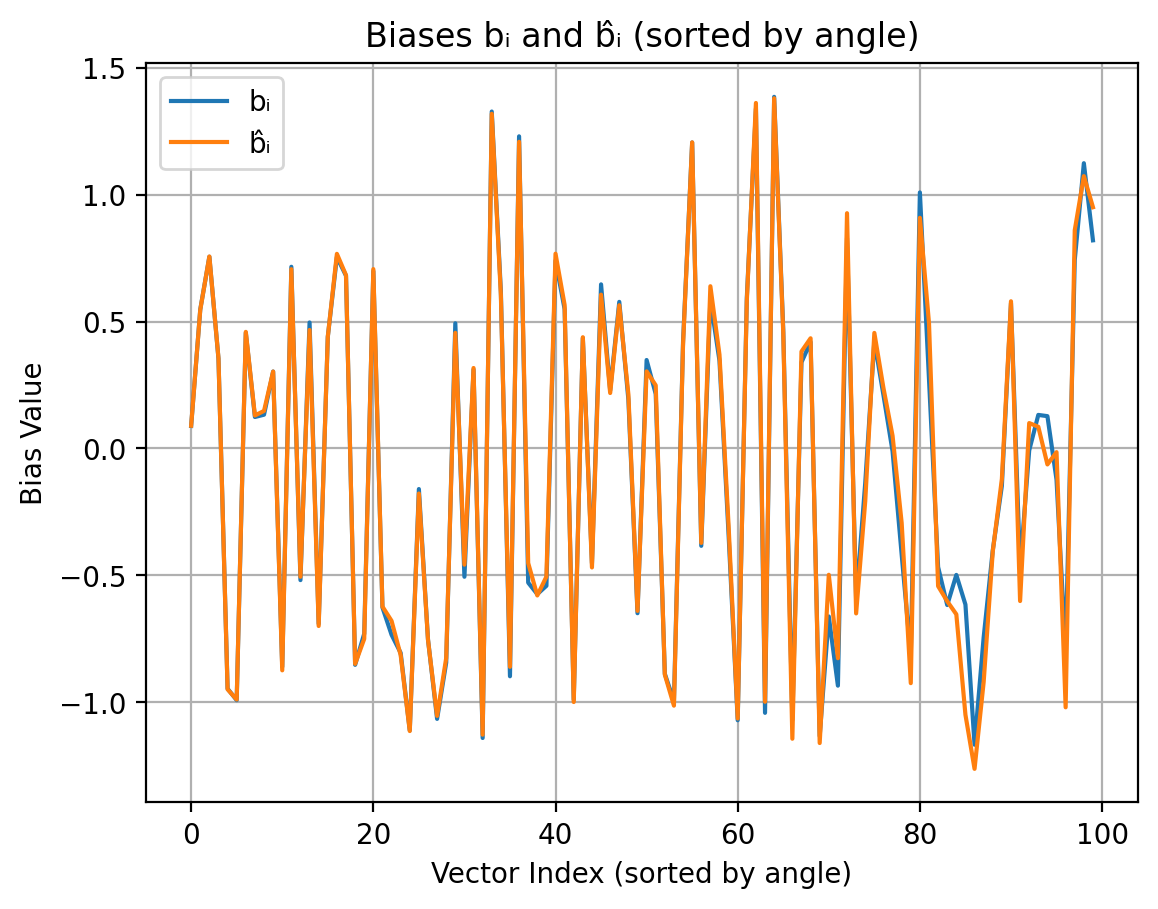

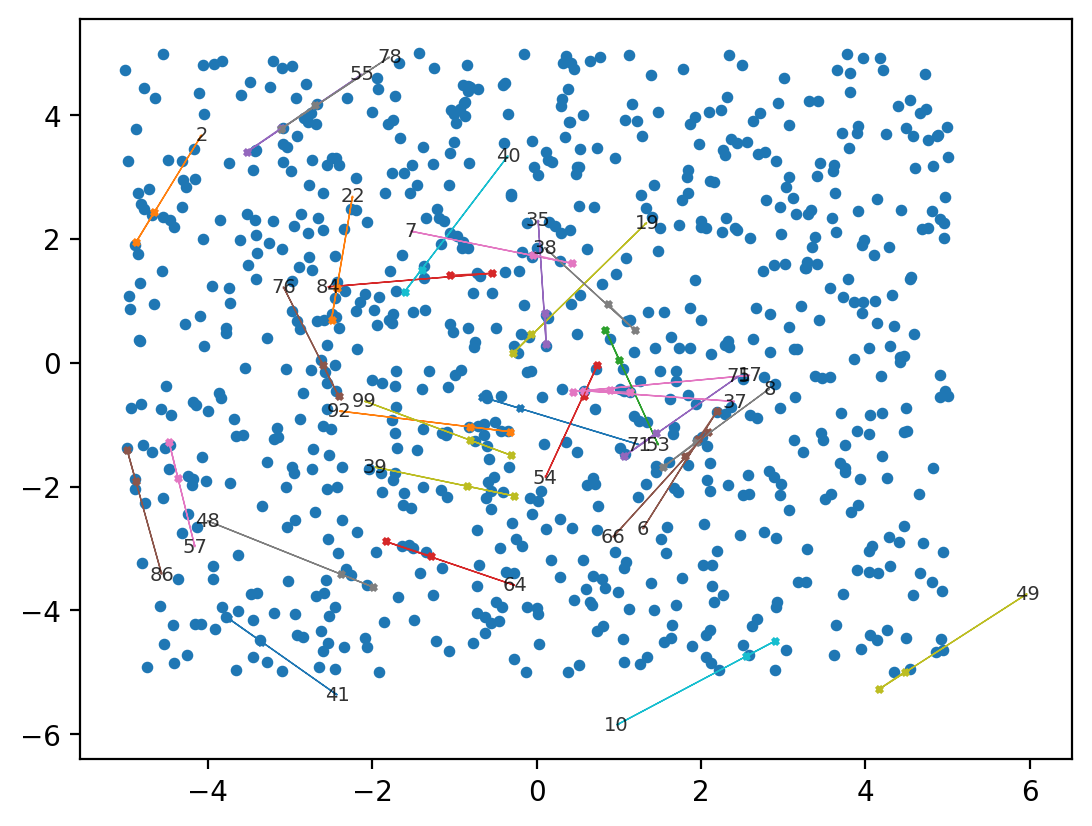

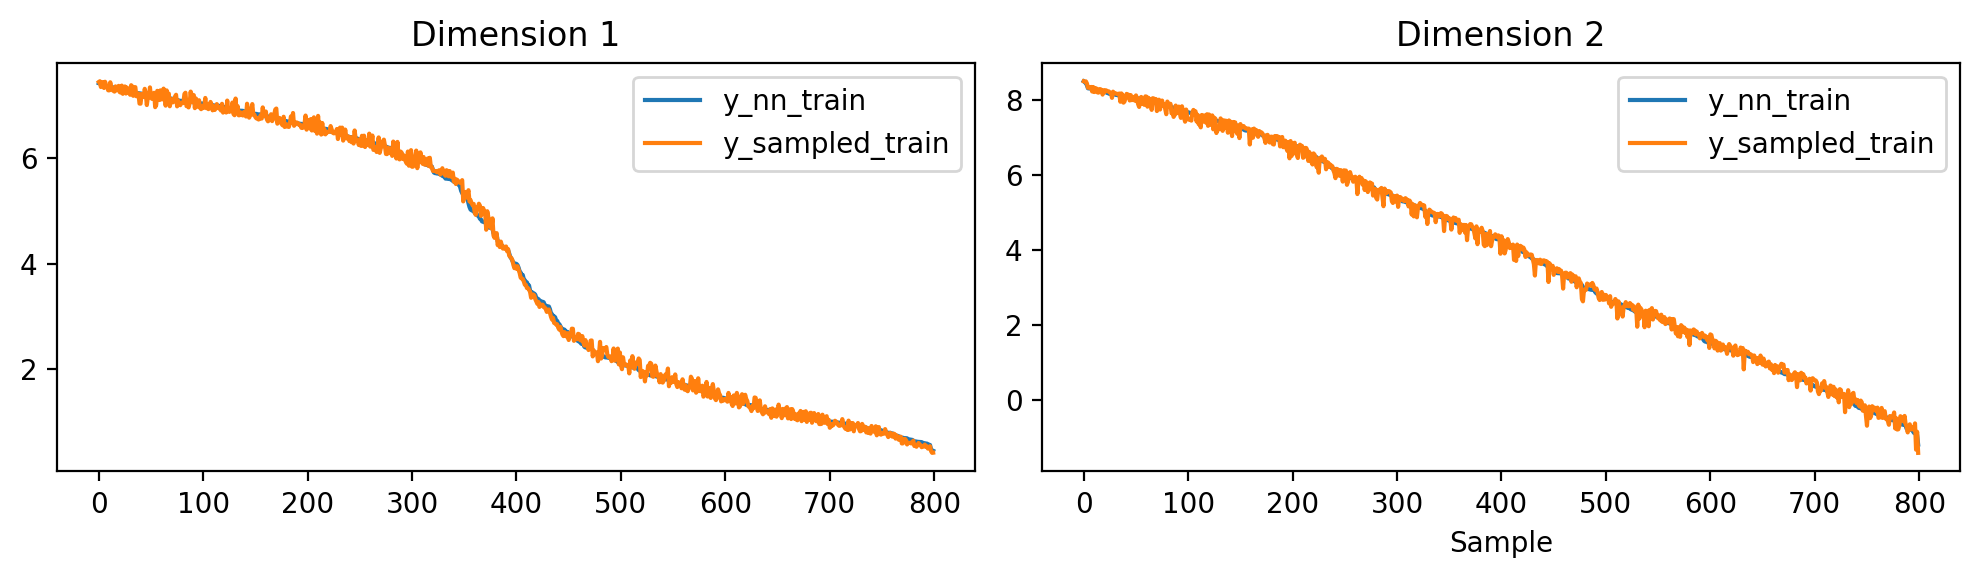

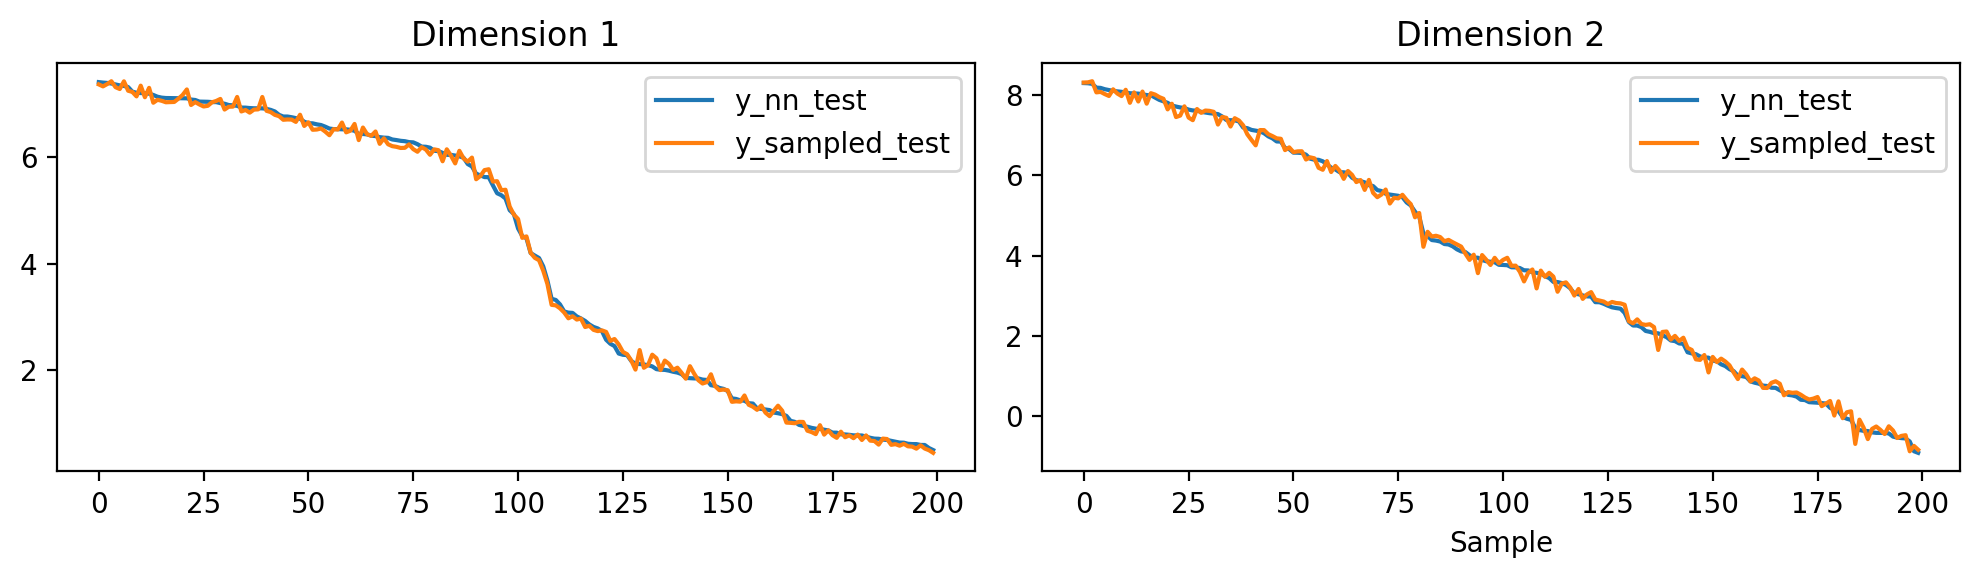

In [11]:
model_sampled = SampledNet()
x_1_X2_tuples = model_sampled.fit(dataset.X_train, y_nn_train, model_nn, layer2="classic", radius=0.09,
                                  choose_x_2="norm", project_onto_boundary=True)

model_nn_vs_model_sampled(dataset, model_nn, model_sampled, x_1_X2_tuples)


### use ridge regression for layer 2

Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 194.51it/s]


alpha 	loss validation
0.0001 	1.438e-03
0.001 	1.447e-03
0.01 	1.387e-03
0.1 	1.234e-03
1 	2.081e-03
10 	8.974e-03
100 	6.802e-02
train: loss(y_nn, y_sampled)
r2: 0.9998614144833908	mse: 0.0009565633864825516
test: loss(y_nn, y_sampled)
r2: 0.9998137772427808	mse: 0.0012851581081947078
weights1 equals weights2:  False


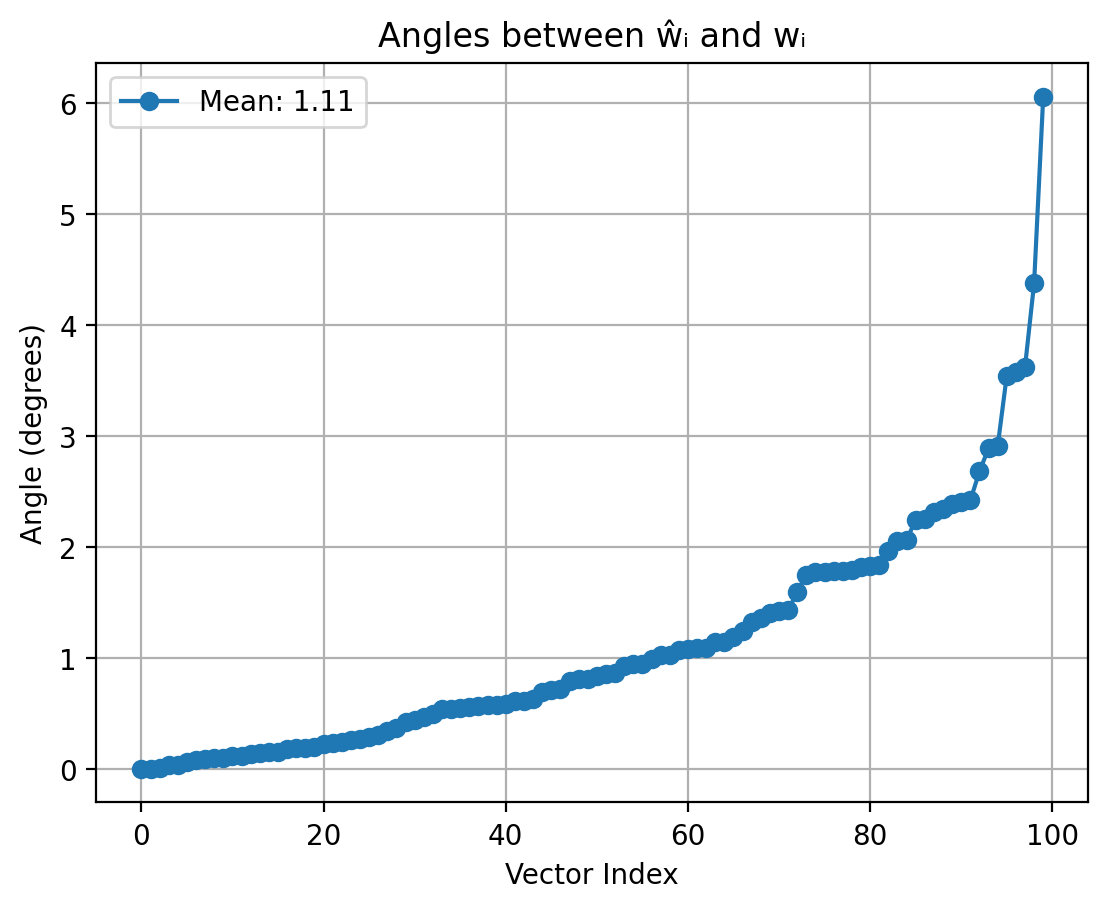

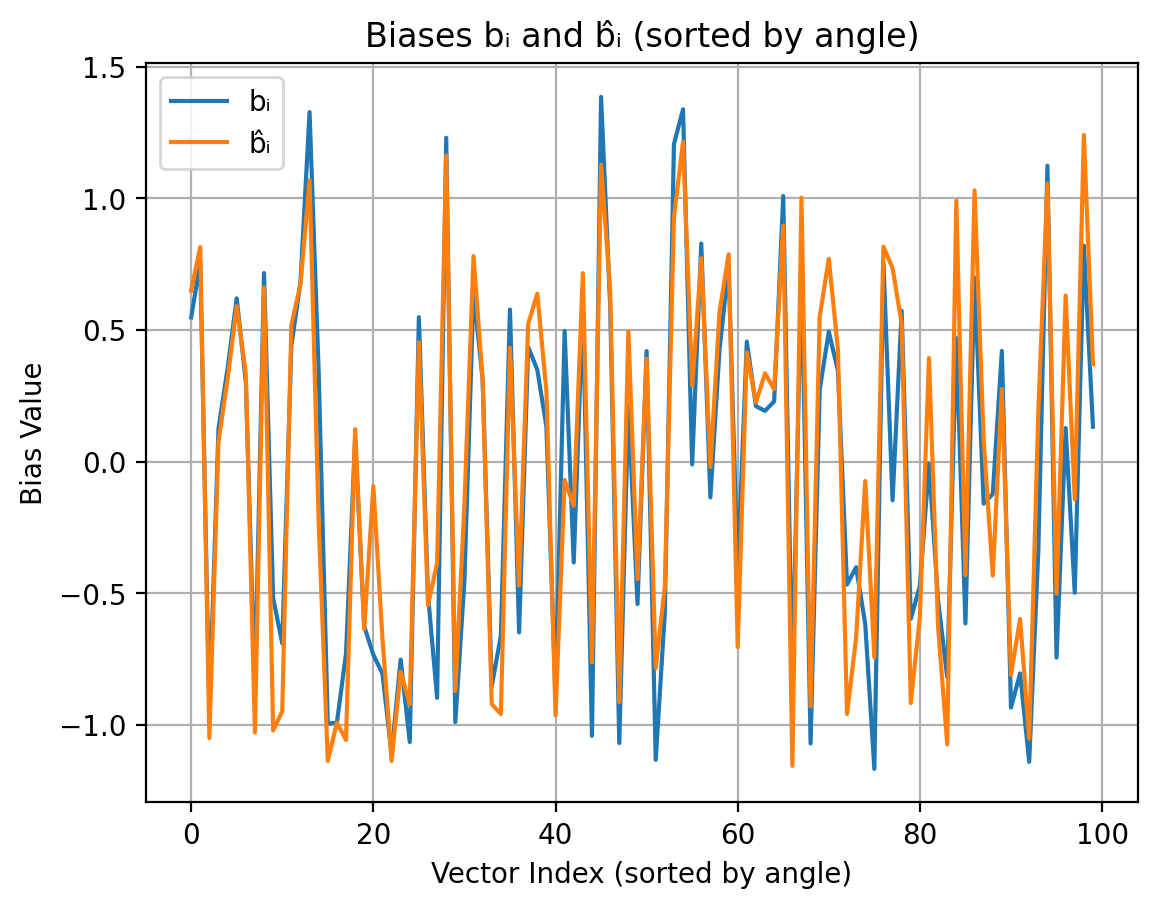

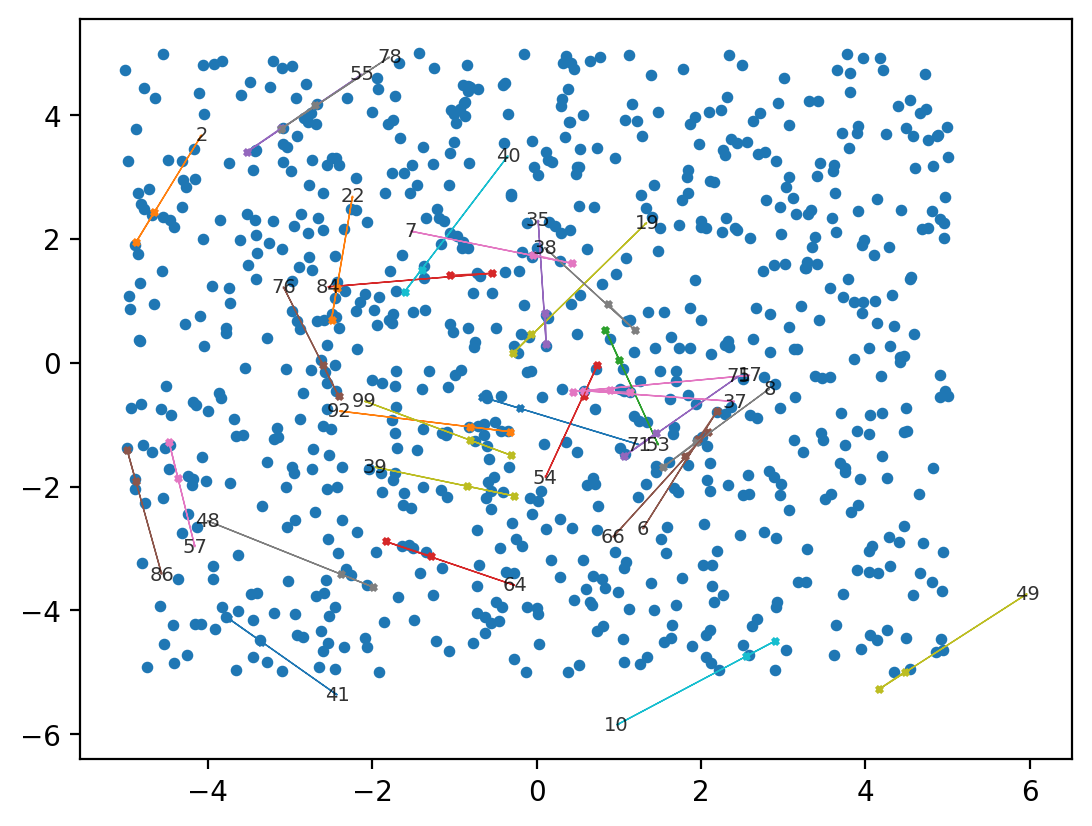

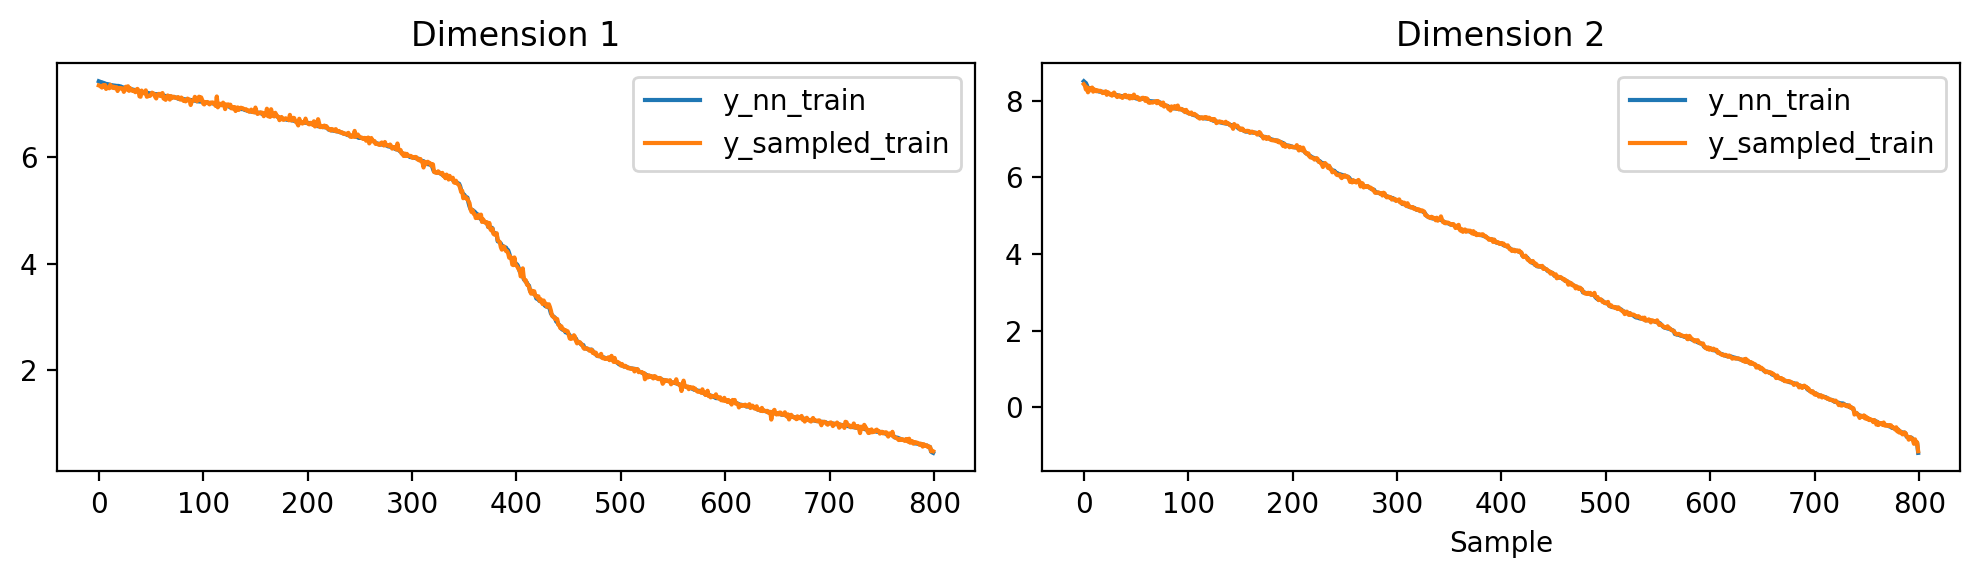

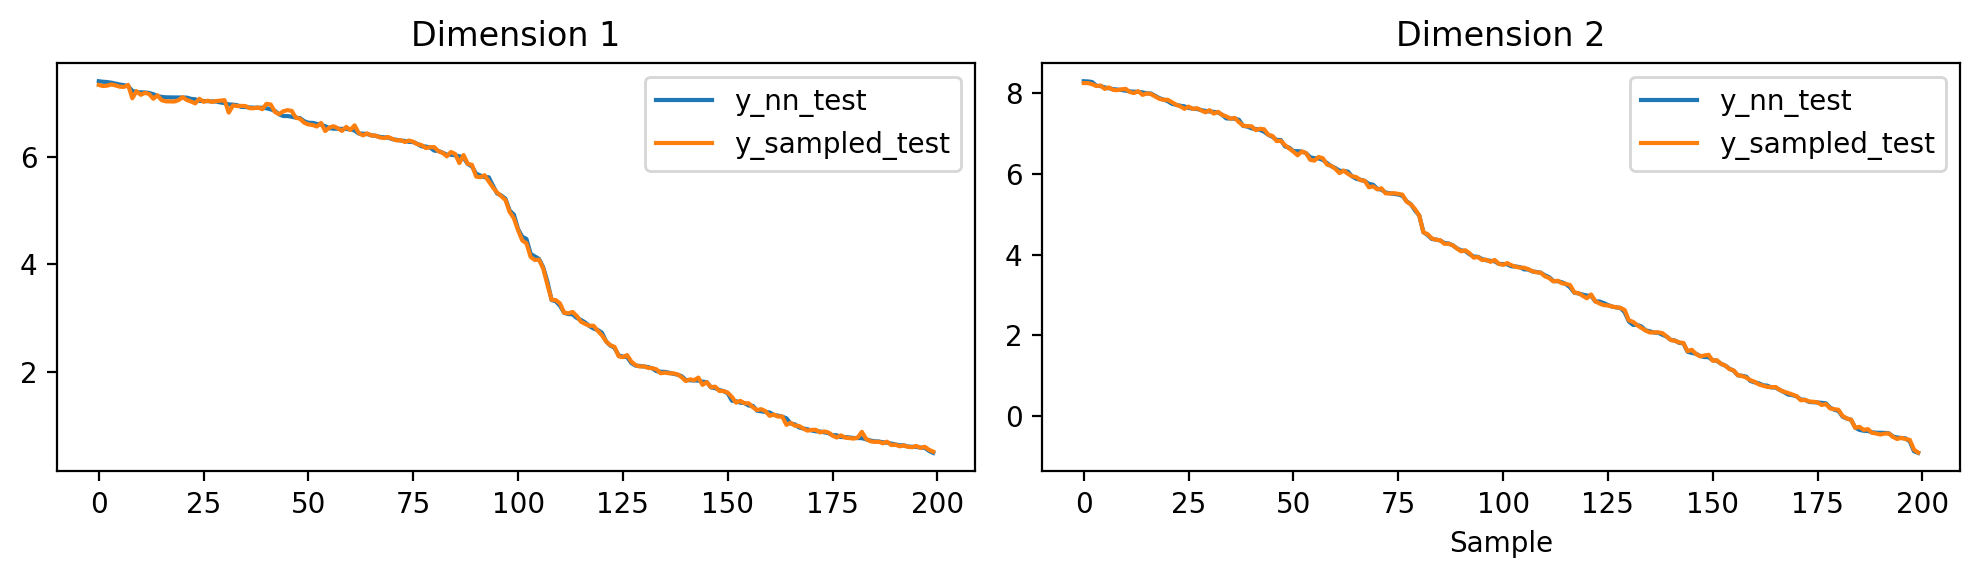

In [12]:
model_sampled = SampledNet()
model_sampled.fit(dataset.X_train, y_nn_train, model_nn, layer2="ridge", radius=0.05,
                  choose_x_2="norm")

model_nn_vs_model_sampled(dataset, model_nn, model_sampled, x_1_X2_tuples)


### Calculate radius vs loss.

In [13]:

y_nn_train = model_nn.predict(dataset.X_train)
y_nn_test = model_nn.predict(dataset.X_test)
weight1 = []
weight2 = []
losses = []
radii = np.linspace(0, 0.5, 10)
for radius in radii:
    model_sampled = SampledNet()
    model_sampled.fit(
        dataset.X_train, y_nn_train, model_nn, layer2="classic", radius=radius, alpha=-1, verbose=0
    )
    weight1.append(model_sampled.weights[0])
    weight2.append(model_nn.weights[0])
    y_sampled_test = model_sampled.predict(dataset.X_test)
    loss_sampled_nn = loss_mse(y_sampled_test, y_nn_test)
    losses.append(loss_sampled_nn)
    print(loss_sampled_nn)

Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 10976.12it/s]


2.255354031845208


Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 178.73it/s]


0.0972561190592241


Layer1 sampling: 100%|██████████| 100/100 [00:01<00:00, 89.50it/s]


0.24290455379255443


Layer1 sampling: 100%|██████████| 100/100 [00:01<00:00, 59.10it/s]


0.4516690919352425


Layer1 sampling: 100%|██████████| 100/100 [00:02<00:00, 44.95it/s]


1.4481455758444595


Layer1 sampling: 100%|██████████| 100/100 [00:02<00:00, 35.24it/s]


3.8786785229569567


Layer1 sampling: 100%|██████████| 100/100 [00:03<00:00, 30.41it/s]


5.724359606815032


Layer1 sampling: 100%|██████████| 100/100 [00:03<00:00, 25.21it/s]


6.892400648679294


Layer1 sampling: 100%|██████████| 100/100 [00:04<00:00, 22.42it/s]


11.890818191486996


Layer1 sampling: 100%|██████████| 100/100 [00:04<00:00, 20.75it/s]

10.455066146621858


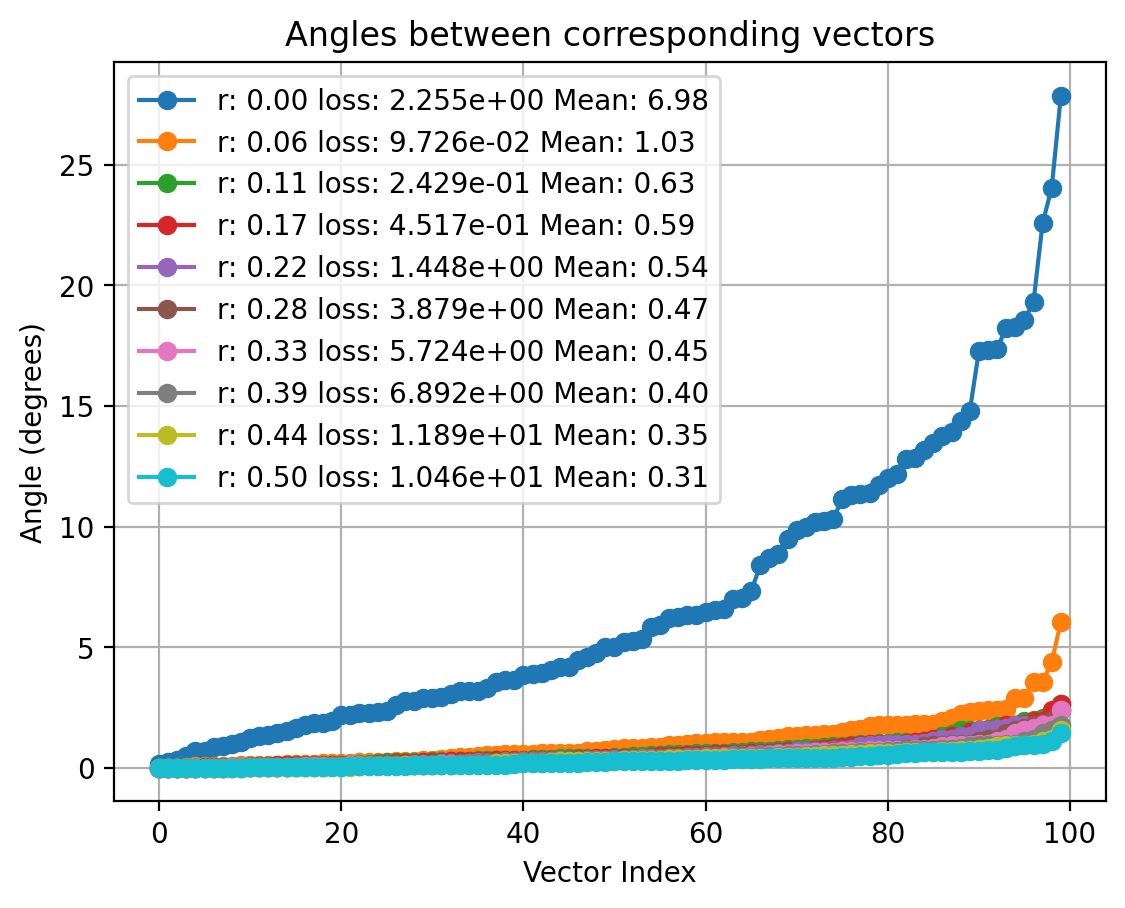

In [14]:
plot_vector_differences(weight1, weight2, radii, losses)

### augment data with gaussian sampling

In [ ]:
xd = 3  # Input space dimensions
yd = 4  # Output dimension
num_samples = 50  # Number of data points
epochs = 100  # Number of training epochs
l = [100]  # Number of neurons in each layer

dataset = Dataset()
dataset.create_dataset_sinus_2d(num_samples)
dataset.scale(preprocessing.MinMaxScaler(feature_range=(-2, 2)))
dataset.split_train_test(0.2)

model_nn = NeuralNet()
model_nn.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=1)
y_nn_train = model_nn.predict(dataset.X_train)
y_nn_test = model_nn.predict(dataset.X_test)

model_sampled = SampledNet()
x_1_X2_tuples = model_sampled.fit(dataset.X_train, y_nn_train, model_nn, layer2="classic", radius=0.05,
                                  choose_x_2="norm")

model_sampled_input_augmented = SampledNet()
x_1_X2_tuples_input_augmented = model_sampled_input_augmented.fit(dataset.X_train, y_nn_train, model_nn,
                                                                  layer2="classic",
                                                                  radius=0.05,
                                                                  choose_x_2="norm", augment_data=(1, 10))

model_nn_vs_model_sampled(dataset, model_nn, model_sampled, x_1_X2_tuples)
model_nn_vs_model_sampled(dataset, model_nn, model_sampled_input_augmented, x_1_X2_tuples_input_augmented)
